<a href="https://colab.research.google.com/github/ranand97/ranand97/blob/main/HumanaCompetion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# Your code goes here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn import metrics
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving target_train.csv to target_train (1).csv
User uploaded file "target_train (1).csv" with length 108426 bytes


In [69]:
data = 'target_train.csv'

In [70]:
df=pd.read_csv(data)
df.head()

,id,therapy_id,therapy_start_date,therapy_end_date,tgt_ade_dc_ind,race_cd,est_age,sex_cd,cms_disabled_ind,cms_low_income_ind
0,1005597228,1005597228-TAGRISSO-1,2020-03-11T00:00:00.000+0000,2020-09-07,0,1.0,NaN,NaN,NaN,NaN
1,1005964858,1005964858-TAGRISSO-1,2021-08-23T00:00:00.000+0000,2021-09-22,1,1.0,86.0,M,0.0,0.0
2,1007548572,1007548572-TAGRISSO-1,2022-01-17T00:00:00.000+0000,2022-07-16,0,1.0,79.0,F,0.0,1.0
3,1009508044,1009508044-TAGRISSO-1,2020-01-23T00:00:00.000+0000,2020-07-21,0,1.0,70.0,F,1.0,1.0
4,1028064791,1028064791-TAGRISSO-1,2021-02-23T00:00:00.000+0000,2021-08-22,0,2.0,74.0,F,1.0,1.0


In [71]:
mode_value = df['tgt_ade_dc_ind'].mode()[0]
df['tgt_ade_dc_ind'] = df['tgt_ade_dc_ind'].fillna(mode_value)
mode_value1 = df['race_cd'].mode()[0]
df['race_cd'] = df['race_cd'].fillna(mode_value1)
mode_value2 = df['est_age'].mode()[0]
df['est_age'] = df['est_age'].fillna(mode_value2)
mode_value3 = df['sex_cd'].mode()[0]
df['sex_cd'] = df['sex_cd'].fillna(mode_value3)
mode_value4 = df['cms_disabled_ind'].mode()[0]
df['cms_disabled_ind'] = df['cms_disabled_ind'].fillna(mode_value4)
mode_value5 = df['cms_low_income_ind'].mode()[0]
df['cms_low_income_ind'] = df['cms_low_income_ind'].fillna(mode_value5)
df.head()

,id,therapy_id,therapy_start_date,therapy_end_date,tgt_ade_dc_ind,race_cd,est_age,sex_cd,cms_disabled_ind,cms_low_income_ind
0,1005597228,1005597228-TAGRISSO-1,2020-03-11T00:00:00.000+0000,2020-09-07,0,1.0,65.0,F,0.0,0.0
1,1005964858,1005964858-TAGRISSO-1,2021-08-23T00:00:00.000+0000,2021-09-22,1,1.0,86.0,M,0.0,0.0
2,1007548572,1007548572-TAGRISSO-1,2022-01-17T00:00:00.000+0000,2022-07-16,0,1.0,79.0,F,0.0,1.0
3,1009508044,1009508044-TAGRISSO-1,2020-01-23T00:00:00.000+0000,2020-07-21,0,1.0,70.0,F,1.0,1.0
4,1028064791,1028064791-TAGRISSO-1,2021-02-23T00:00:00.000+0000,2021-08-22,0,2.0,74.0,F,1.0,1.0


In [72]:
df.isnull().values.any()

False

In [73]:
def remove_out(column, df):
  Q1 = np.percentile(df[column], 25, interpolation = 'midpoint')
  Q3 = np.percentile(df[column], 75, interpolation = 'midpoint')
  IQR = Q3 - Q1
  upper = np.where(df[column] >= (Q3+1.5*IQR))
  lower = np.where(df[column] <= (Q1-1.5*IQR))
  df.drop(upper[0], inplace = True)
  df.drop(lower[0], inplace = True)
  df.reset_index(drop=True, inplace=True)
  return df

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn import metrics



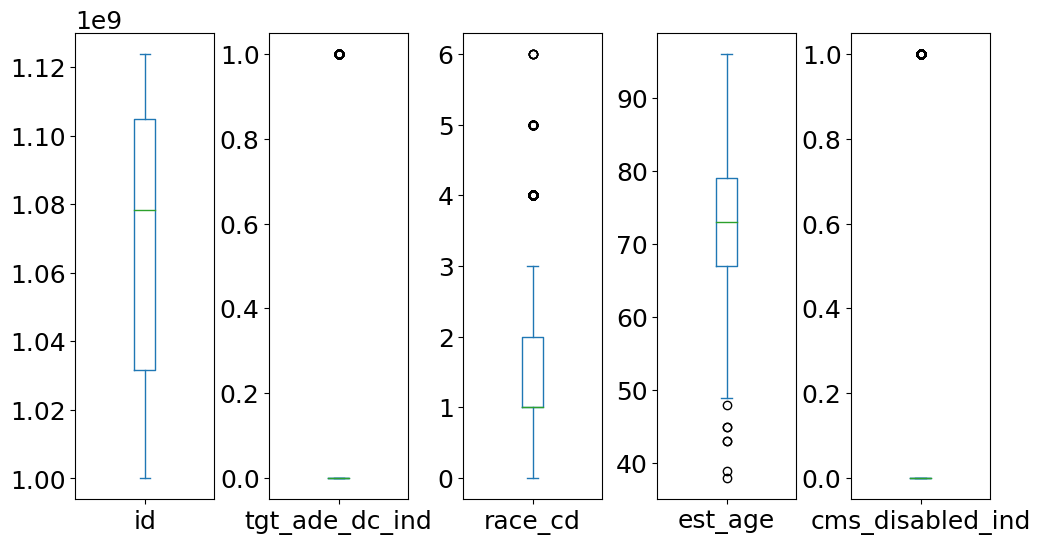

In [75]:
df.iloc[:,:-1].plot(kind='box', subplots=True, layout=(2,14),figsize=(14,14), sharex=False, sharey=False)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=2,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()


In [76]:
def remove_out(column, df):
  Q1 = np.percentile(df[column], 25, interpolation = 'midpoint')
  Q3 = np.percentile(df[column], 75, interpolation = 'midpoint')
  IQR = Q3 - Q1
  upper = np.where(df[column] >= (Q3+1.5*IQR))
  lower = np.where(df[column] <= (Q1-1.5*IQR))
  df.drop(upper[0], inplace = True)
  df.drop(lower[0], inplace = True)
  df.reset_index(drop=True, inplace=True)
  return df

In [88]:
df.shape





(1232, 10)

ValueError: ignored